1.Setting up the Environment

In [68]:
 #Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Step 3: Load the dataset
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory (1).csv


In [30]:
# Read the CSV file
df = pd.read_csv('weatherHistory.csv')

2.Data Exploration and Preprocessing


In [31]:
# Step 4: Explore the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (96453, 12)

First few rows:
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0         

In [32]:

# Step 5: Data Preprocessing
# Convert date column to datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [33]:
# Set date as index
df.set_index('Formatted Date', inplace=True)

In [34]:
# Check for missing values in Precip Type
print("\nUnique values in Precip Type:", df['Precip Type'].unique())
print("Value counts:")
print(df['Precip Type'].value_counts())


Unique values in Precip Type: ['rain' 'snow' nan]
Value counts:
Precip Type
rain    85224
snow    10712
Name: count, dtype: int64


In [35]:
# Fill missing precipitation types with 'unknown'
df['Precip Type'].fillna('unknown', inplace=True)


In [36]:
# Check for other missing values
print("\nMissing values after precipitation handling:")
print(df.isnull().sum())


Missing values after precipitation handling:
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [37]:
# Drop columns with all missing values or constant values
df.drop(['Loud Cover'], axis=1, inplace=True)



In [38]:
# Step 6: Feature Engineering
# Extract time-based features
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year

In [39]:
# Check the dataset after feature engineering
print("\nDataset after feature engineering:")
print(df.head())


Dataset after feature engineering:
                                 Summary Precip Type  Temperature (C)  \
Formatted Date                                                          
2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

                           Apparent Temperature (C)  Humidity  \
Formatted Date                                                  
2006-03-31 22:00:00+00:00                  7.388889      0.89   
2006-03-31 23:00:00+00:00                  7.227778      0.86   
2006-04-01 00:00:00+00:00                  9.377778      0.89   
2006-04-01 01:00:00+00:00                  5.944444      0.83   
2006-04-01 02:00:00+00:00                  6.977778      0.83 

3.Exploratory Data Analysis

In [40]:
# Step 7: Exploratory Data Analysis
# Set up the visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


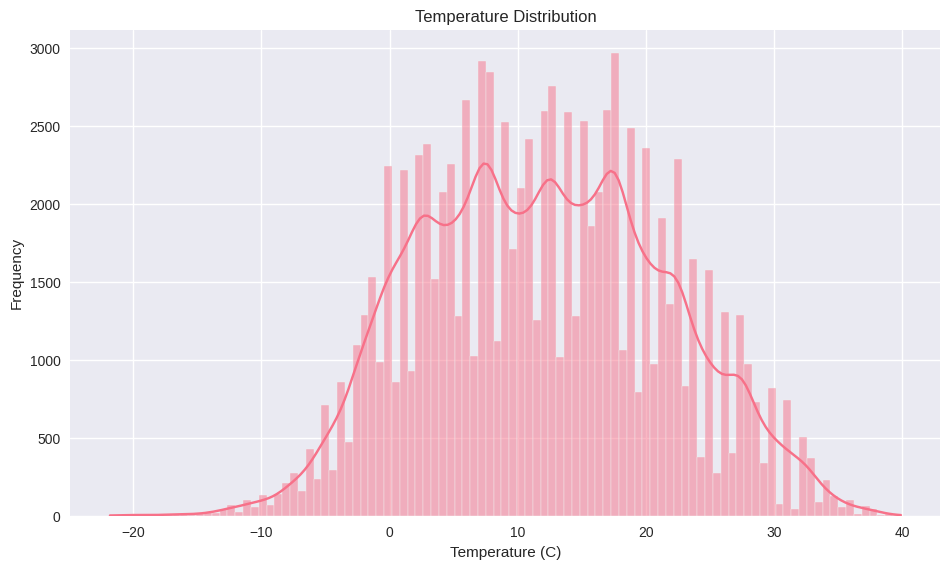

In [41]:
# Plot temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature (C)'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

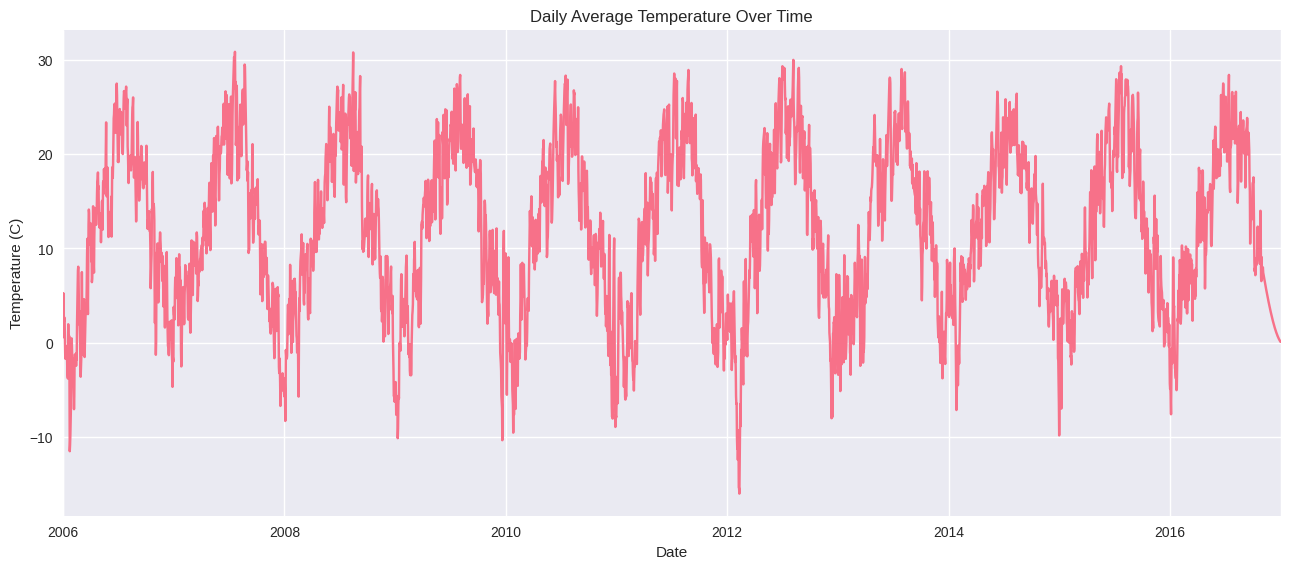

In [42]:
# Plot temperature over time
plt.figure(figsize=(14, 6))
df['Temperature (C)'].resample('D').mean().plot()
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

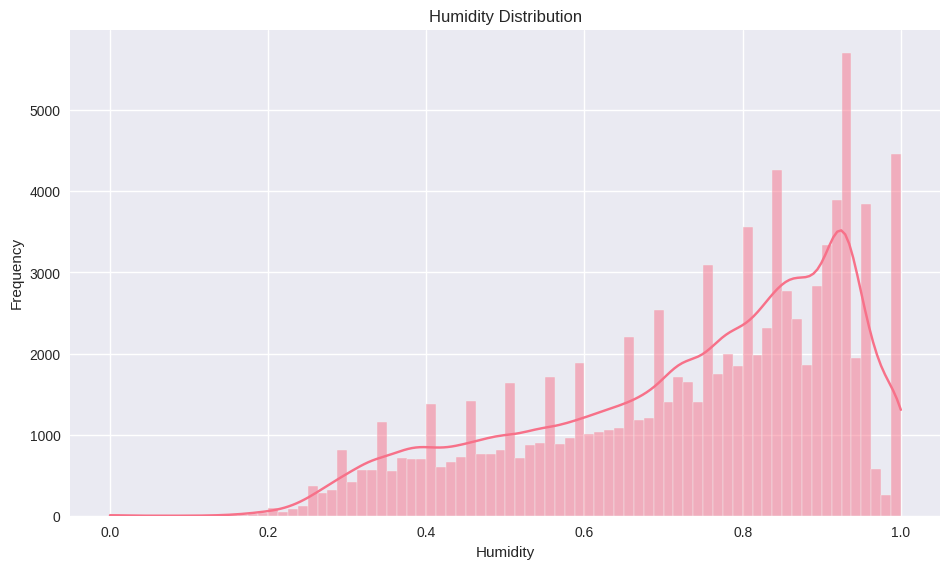

In [43]:
# Plot humidity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Humidity'], kde=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

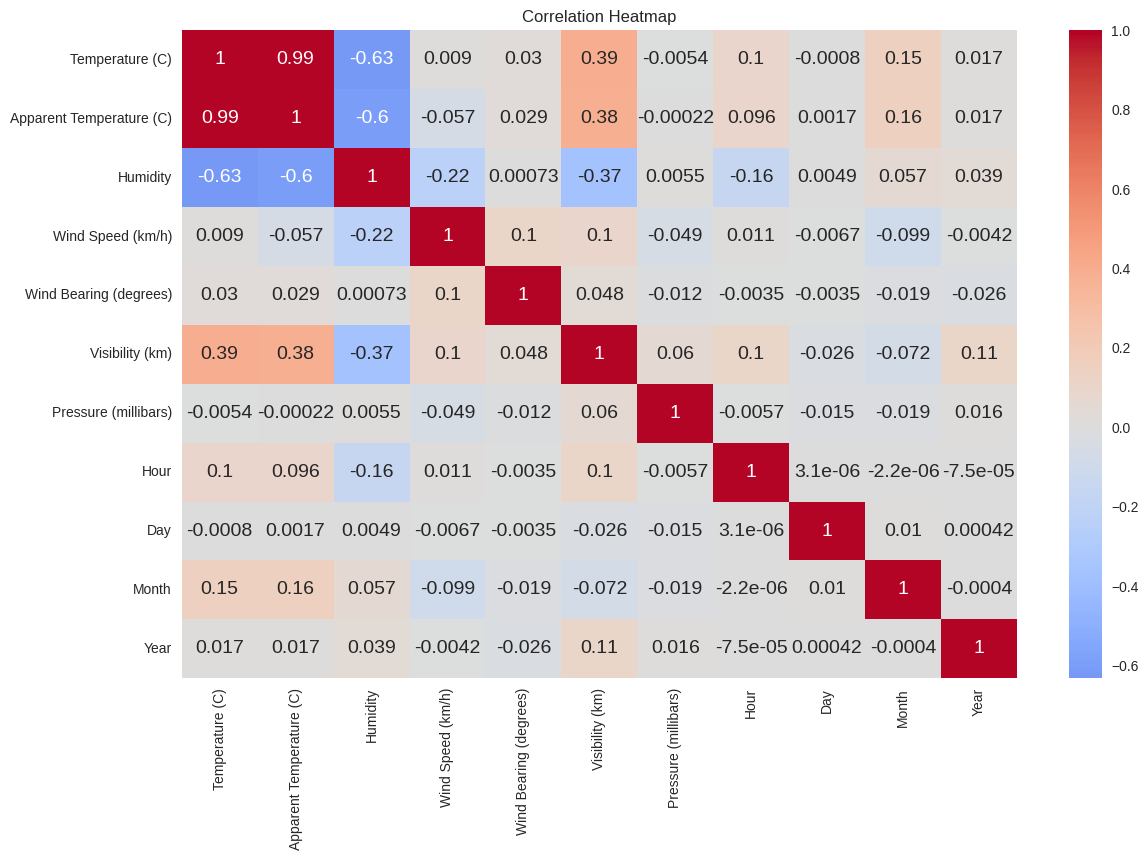

In [44]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

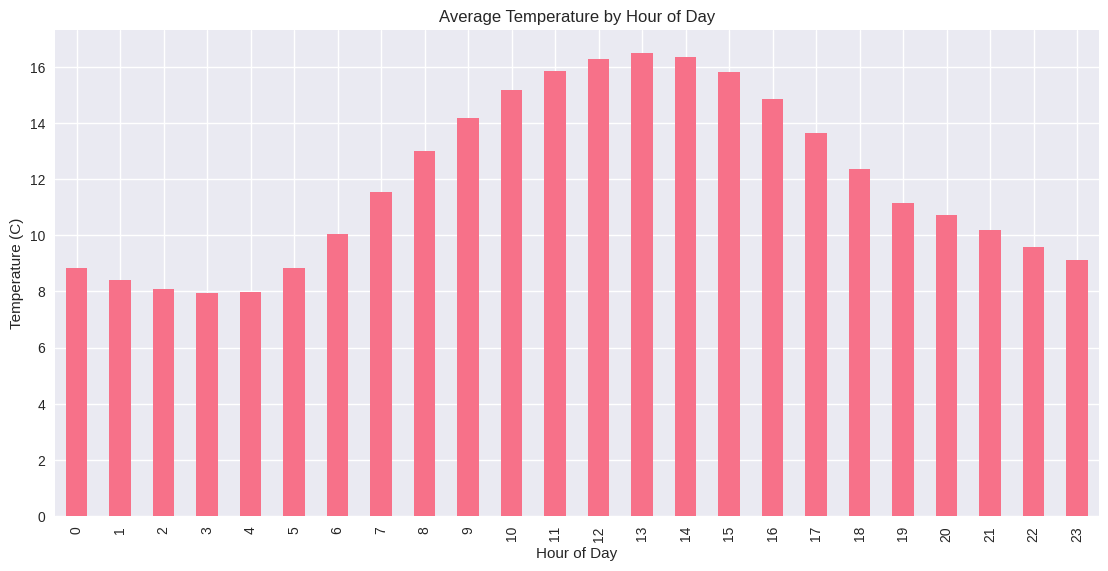

In [45]:
# Plot temperature by hour
plt.figure(figsize=(12, 6))
df.groupby('Hour')['Temperature (C)'].mean().plot(kind='bar')
plt.title('Average Temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (C)')
plt.show()

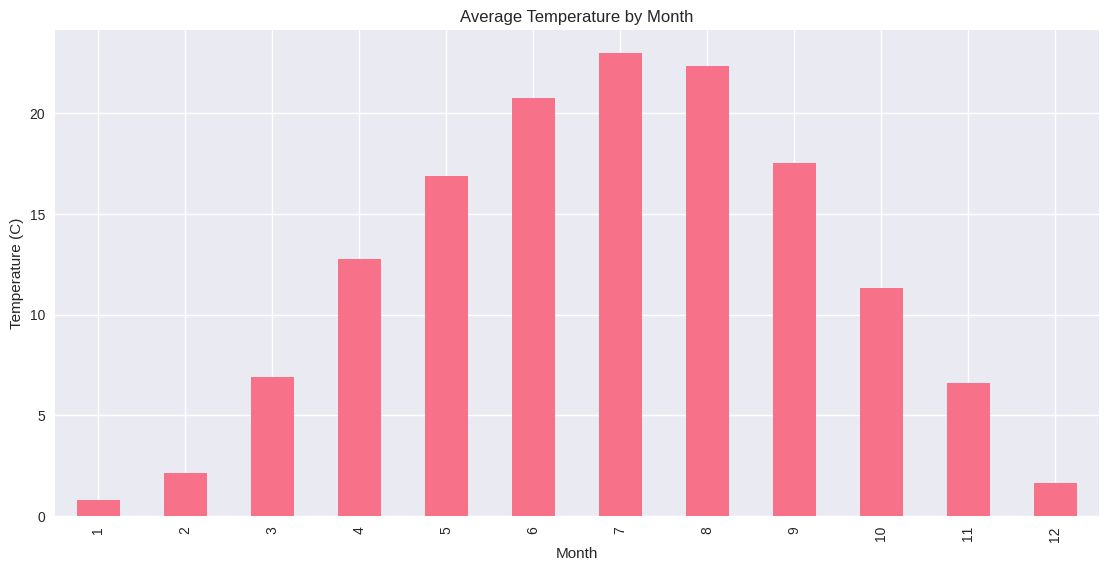

In [46]:
# Plot temperature by month
plt.figure(figsize=(12, 6))
df.groupby('Month')['Temperature (C)'].mean().plot(kind='bar')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()

In [47]:
# Step 8: Time Series Decomposition
# Resample to daily data for decomposition
daily_temp = df['Temperature (C)'].resample('D').mean()


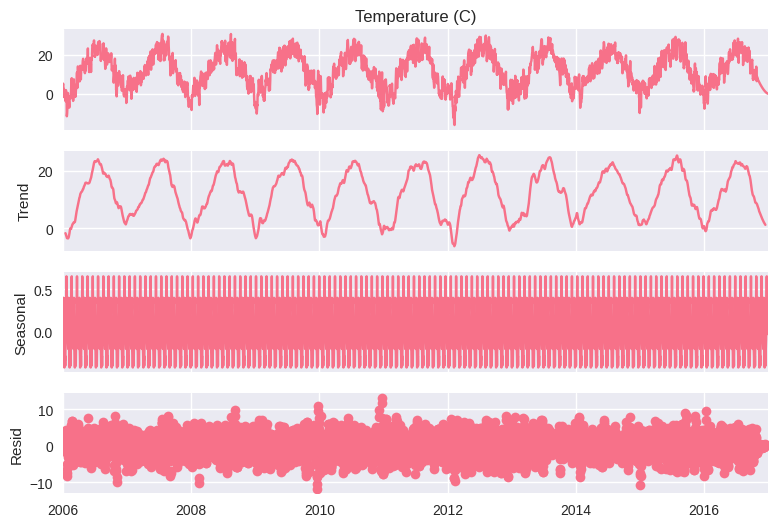

In [66]:
# Import libraries
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Example: agar tere paas daily_temp ek DataFrame hai with 'Date' aur 'Temperature'
# (agar already bana hua hai toh yeh step skip kar sakti hai)
# daily_temp = pd.read_csv("your_dataset.csv")
# daily_temp['Date'] = pd.to_datetime(daily_temp['Date'])
# daily_temp.set_index('Date', inplace=True)

# Ab check kar lein ki daily_temp Series hai ya DataFrame
if isinstance(daily_temp, pd.DataFrame):
    # agar DataFrame hai toh Temperature column le lenge
    ts = daily_temp['Temperature']
else:
    # agar pehle se hi Series hai toh use hi lenge
    ts = daily_temp

# Time series decomposition (period=30 matlab monthly approx)
decomposition = seasonal_decompose(ts, period=30)

# Plot results
fig = decomposition.plot()
plt.show()


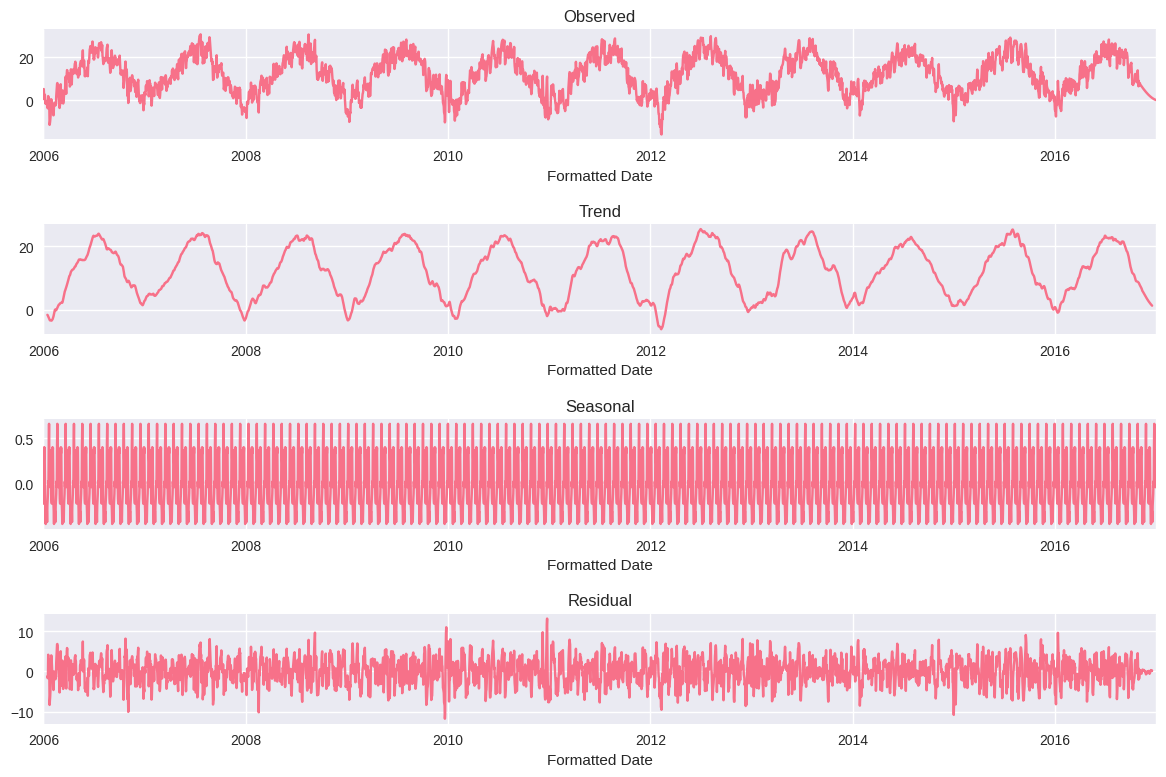

In [67]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
decomposition.observed.plot(ax=plt.gca())
plt.title('Observed')
plt.subplot(412)
decomposition.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(413)
decomposition.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')
plt.subplot(414)
decomposition.resid.plot(ax=plt.gca())
plt.title('Residual')
plt.tight_layout()
plt.show()

Data for Modeling

In [59]:
# Step 9: Prepare data for machine learning
# Create features for modeling
df_ml = df.copy()


In [60]:
# Encode categorical variables
df_ml = pd.get_dummies(df_ml, columns=['Precip Type', 'Summary', 'Daily Summary'], drop_first=True)


In [61]:
# Define features and target
X = df_ml.drop('Temperature (C)', axis=1)
y = df_ml['Temperature (C)']

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (77162, 251)
Testing set shape: (19291, 251)


In [69]:
# Step 10: Train and evaluate models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)


In [65]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [70]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")
    print("-" * 40)

    return mse, mae, r2

lr_mse, lr_mae, lr_r2 = evaluate_model(y_test, lr_pred, "Linear Regression")
rf_mse, rf_mae, rf_r2 = evaluate_model(y_test, rf_pred, "Random Forest")

Linear Regression Performance:
Mean Squared Error: 0.8285
Mean Absolute Error: 0.7139
R-squared: 0.9910
----------------------------------------
Random Forest Performance:
Mean Squared Error: 0.0022
Mean Absolute Error: 0.0136
R-squared: 1.0000
----------------------------------------


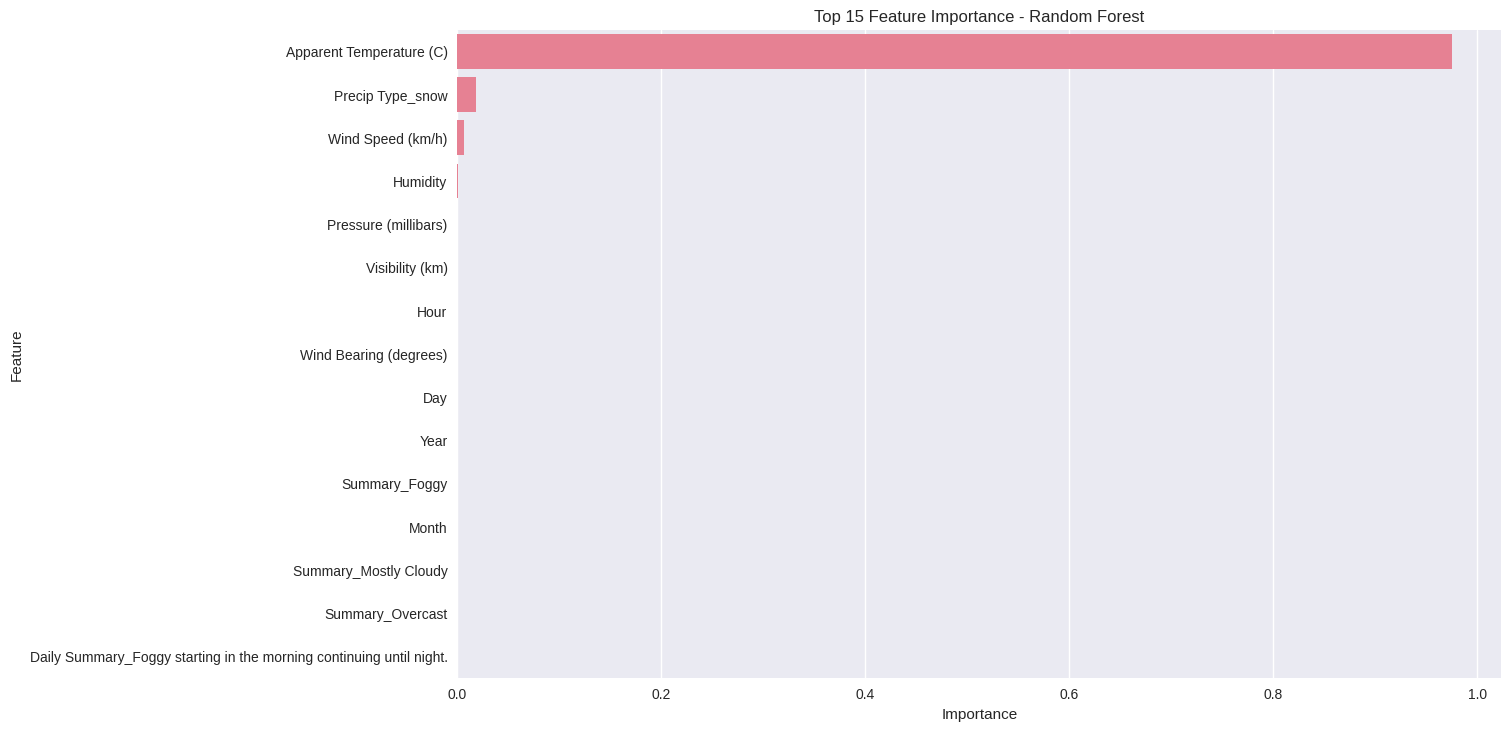

In [71]:
# Step 11: Feature Importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

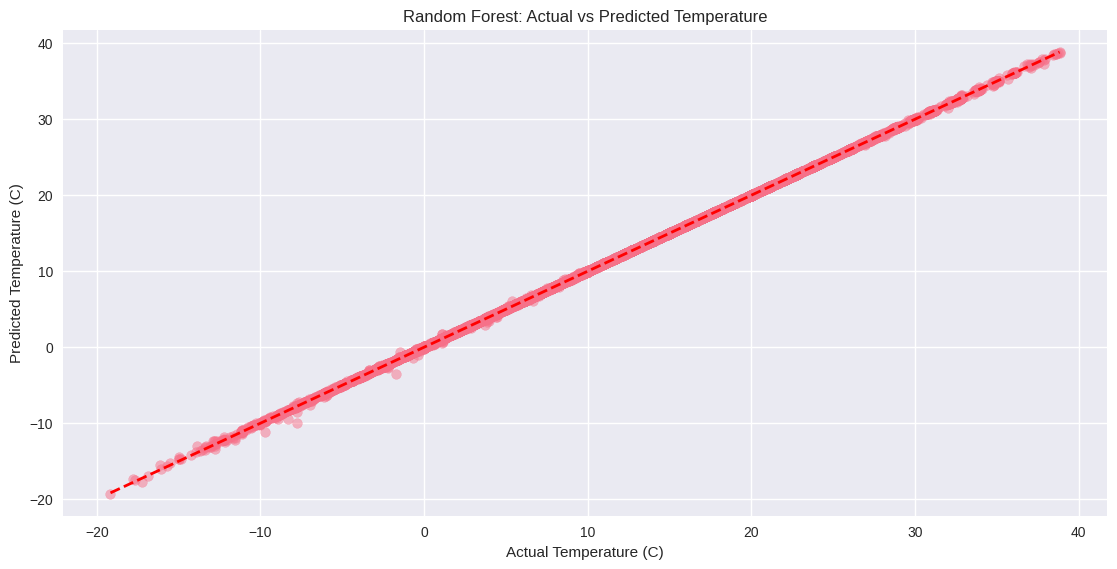

In [72]:
# Step 12: Visualize predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.title('Random Forest: Actual vs Predicted Temperature')
plt.show()

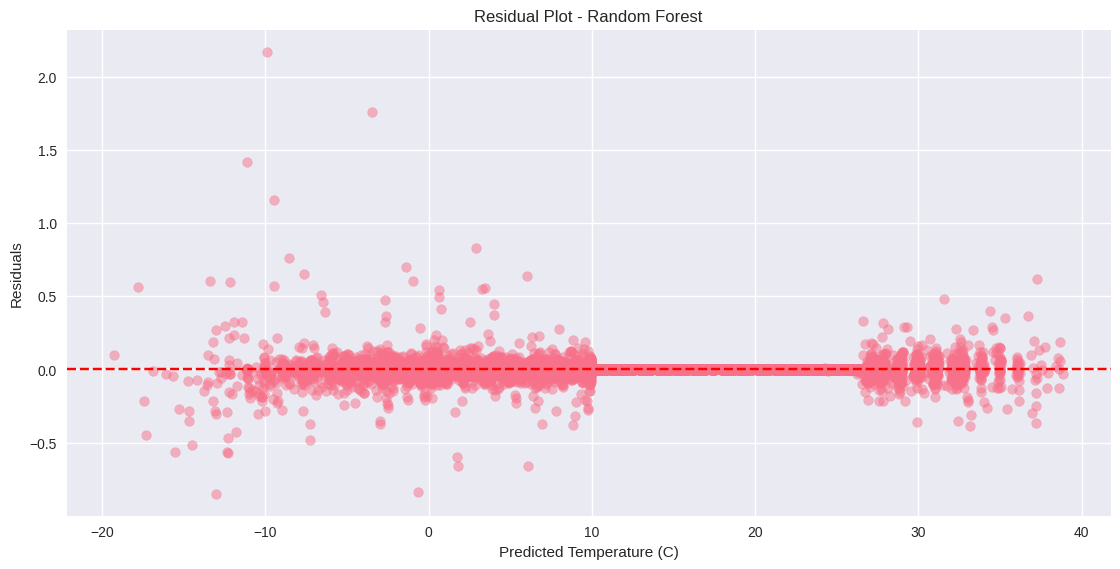

In [73]:
# Step 13: Residual analysis
residuals = y_test - rf_pred
plt.figure(figsize=(12, 6))
plt.scatter(rf_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Temperature (C)')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest')
plt.show()

In [74]:
# Step 14: Future prediction (using the last 30 days to predict next day)
# For demonstration, we'll use a simple approach
last_30_days = df['Temperature (C)'].resample('D').mean().tail(30)


In [75]:
# Create a simple forecast using average of last 7 days
next_day_pred = last_30_days.tail(7).mean()

In [76]:
print(f"Predicted temperature for next day: {next_day_pred:.2f}°C")


Predicted temperature for next day: 0.23°C


In [77]:
# Step 15: Save the model for future use
import joblib
joblib.dump(rf_model, 'temperature_predictor.pkl')

['temperature_predictor.pkl']

In [78]:
# Download the model file
files.download('temperature_predictor.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Additional Visualization and Analysis

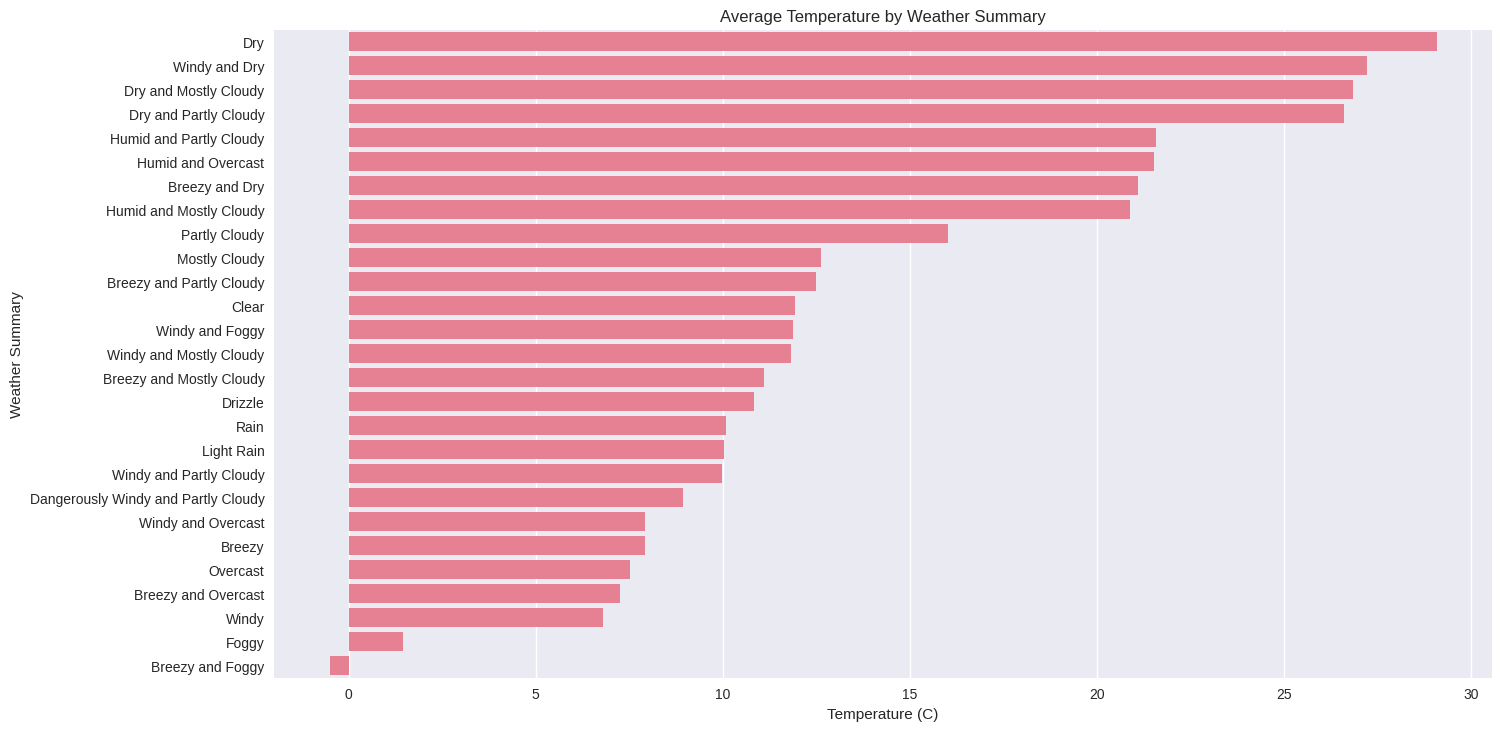

In [79]:
# Additional Analysis: Temperature trends by weather summary
plt.figure(figsize=(14, 8))
summary_temp = df.groupby('Summary')['Temperature (C)'].mean().sort_values(ascending=False)
sns.barplot(x=summary_temp.values, y=summary_temp.index)
plt.title('Average Temperature by Weather Summary')
plt.xlabel('Temperature (C)')
plt.ylabel('Weather Summary')
plt.show()

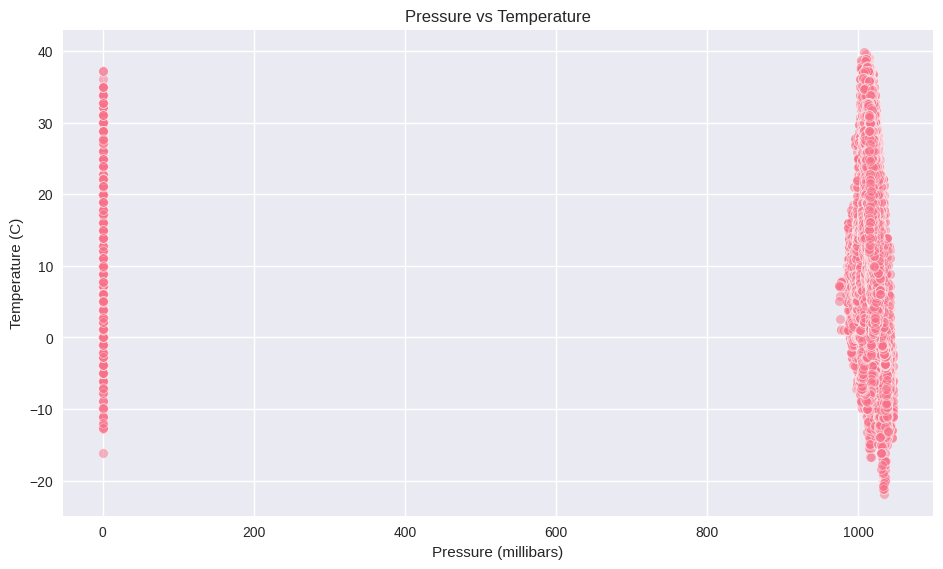

In [80]:
# Additional Analysis: Pressure vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pressure (millibars)', y='Temperature (C)', data=df, alpha=0.5)
plt.title('Pressure vs Temperature')
plt.show()

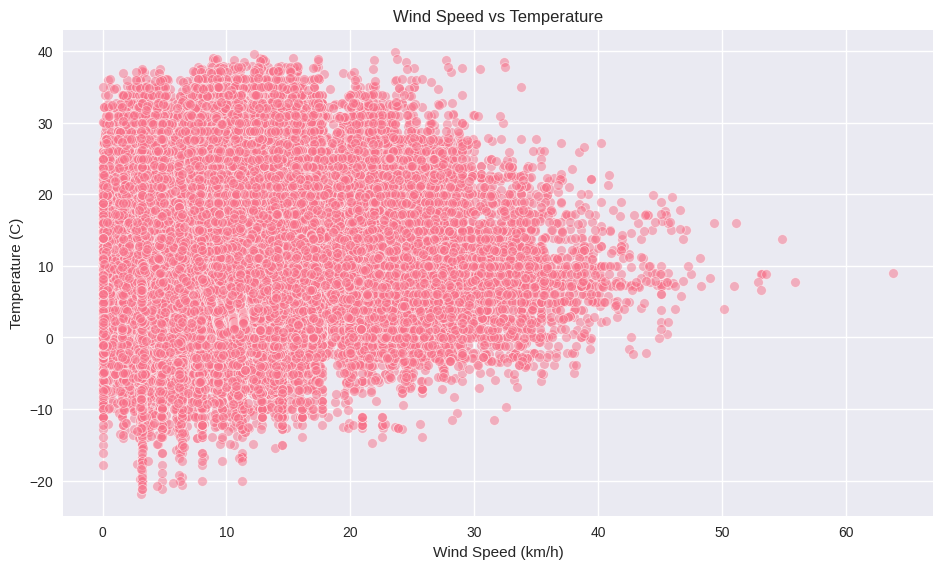

In [81]:
# Additional Analysis: Wind Speed vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wind Speed (km/h)', y='Temperature (C)', data=df, alpha=0.5)
plt.title('Wind Speed vs Temperature')
plt.show()

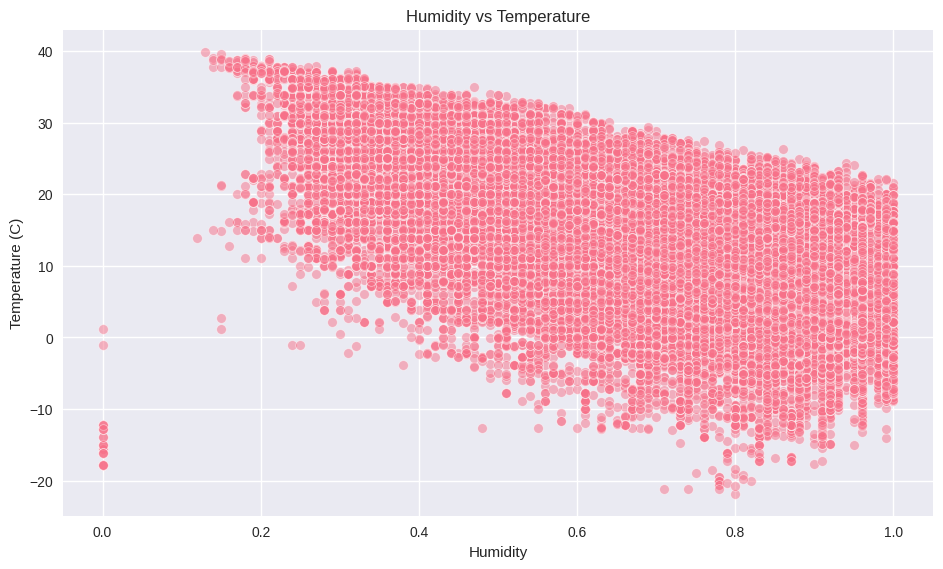

In [82]:
# Additional Analysis: Humidity vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Humidity', y='Temperature (C)', data=df, alpha=0.5)
plt.title('Humidity vs Temperature')
plt.show()


In [83]:
# Print final summary
print("=" * 60)
print("WEATHER DATA ANALYSIS AND PREDICTION SUMMARY")
print("=" * 60)
print(f"Dataset size: {df.shape}")
print(f"Time period: {df.index.min()} to {df.index.max()}")
print(f"Number of features: {len(df.columns)}")
print(f"Best model: Random Forest (R² = {rf_r2:.4f})")
print("=" * 60)


WEATHER DATA ANALYSIS AND PREDICTION SUMMARY
Dataset size: (96453, 14)
Time period: 2005-12-31 23:00:00+00:00 to 2016-12-31 22:00:00+00:00
Number of features: 14
Best model: Random Forest (R² = 1.0000)
